Equation 1 from the lab manual:
spiral arm equation in polar coordinates

$R_\text{arm} = R_0 e^{\kappa(\phi - \phi_0)}$

$\ln R_\text{arm} = \ln R_0 + \kappa(\phi - \phi_0)$

$\ln R_\text{arm} = \ln R_0 + \kappa \phi - \kappa \phi_0$

$y = \ln R_\text{arm}$,

$x = \phi$,

$m = \kappa$,

$b = \ln R_0 - \kappa \phi_0$

Not relevant:

$\kappa \phi = \ln R_\text{arm} - \ln R_0 + \kappa \phi_0$

$\phi = \ln (\frac{R_\text{arm}}{R_0}) \,  / \,  \kappa + \phi_0$

$\phi = \alpha + \phi_0$

where $\alpha \equiv \ln (\frac{R_\text{arm}}{R_0}) / \kappa$

Equation 8 from the lab manual:

$V_\text{Dopp} = [\frac{V(R)}{R} - \frac{V(R_\odot)}{R_\odot}] R_\odot \sin(\ell)$

at the solar circle, $V(R_\odot) \approx 220$ km / s and $R_\odot \approx 8.5$ kpc.

In [1]:
# I wanted to do %matplotlib notebook for interactivity
# but for some reason all the plots disappear.
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

In [33]:
def polar_plot(phi1, r1, title, c1="blue", m1="+", 
              phi2=None, r2=None, c2="red", m2="x"):
    fig = plt.figure(figsize=(6,6))
    plt.subplots_adjust(left=.15, bottom=.15, right=.75, top=.9)
    ax = fig.add_subplot(111, projection='polar')

    ax.plot(phi1, r1, color=c1, marker=m1, linestyle="None")
    if (phi2 is not None and r2 is not None):
        ax.plot(phi2, r2, color=c2, marker=m2, linestyle="None")
    
    plt.title('Random Phi [0, 360] and Radii [0, 50]\n')

<IPython.core.display.Javascript object>


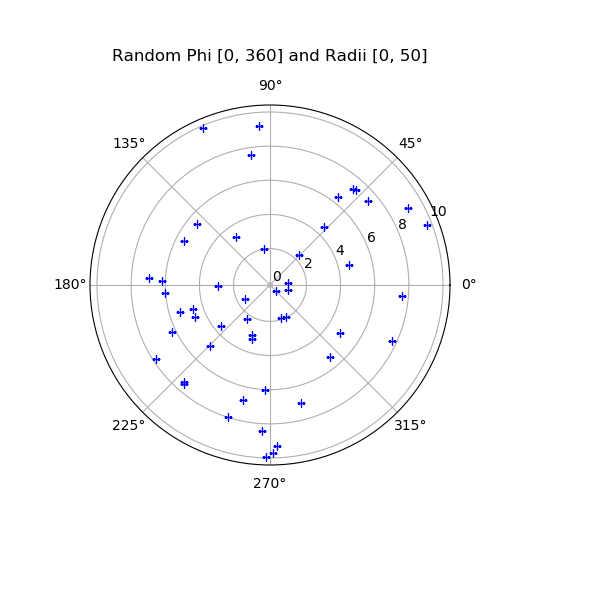

In [34]:
phi_random = np.random.rand(50) * 360
r_random = np.random.rand(50) * 10

polar_plot(phi_random, r_random, 
           'Random Phi [0, 360] and Radii [0, 50]\n')

<IPython.core.display.Javascript object>


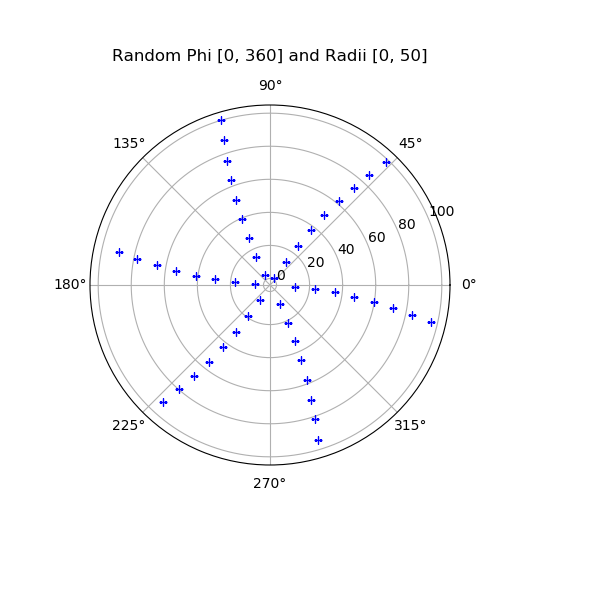

In [35]:
phi_even = np.linspace(1, 360, 50)
r_even = np.linspace(1, 100, 50)

polar_plot(phi_even, r_even,
    'Evenly Spaced Phi and Radii\n')

In [4]:
even_fit = np.polyfit(phi_even, np.log(r_even), 1, full=False)
#square_sum = sum(even_fit[1] ** 2)
#print('Sum of squares:', square_sum)

In [5]:
kappa = even_fit[0]
offset = even_fit[1]
print('Automatic fit found:')
print('Tangent of pitch angle = ' + str(kappa))
print('Radial offset and phase term = ' + str(offset))

Automatic fit found:
Tangent of pitch angle = 0.008082435964405823
Radial offset and phase term = 2.1627629206082277


<IPython.core.display.Javascript object>


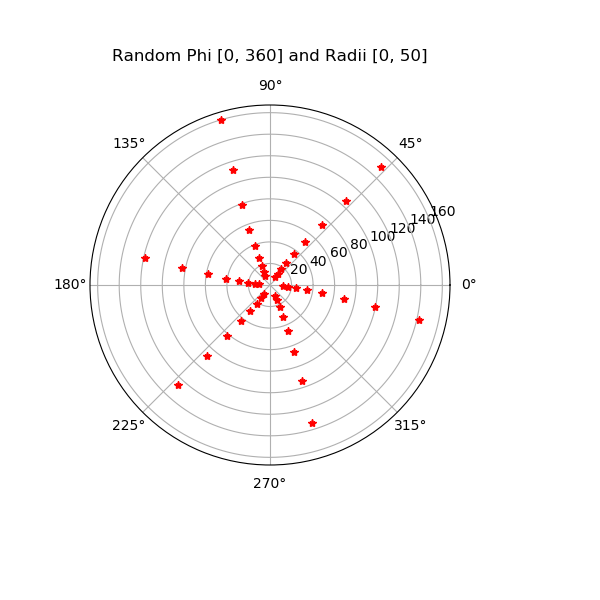

In [36]:
y = kappa * phi_even + offset
predicted = np.exp(y)

polar_plot(phi_even, predicted, 
           'Predicted Radii Ss Phi\n',
           c1="red", m1="*")

<IPython.core.display.Javascript object>


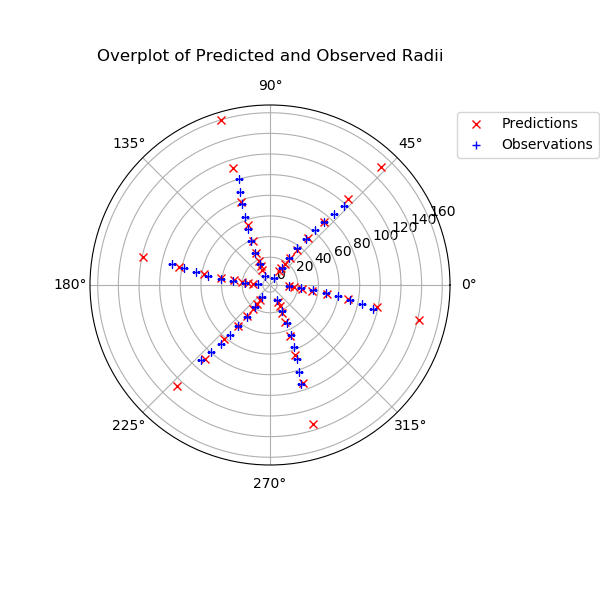

Text(0.5, 1.05, 'Overplot of Predicted and Observed Radii\n')

In [8]:
fig = plt.figure(figsize=(6,6))
plt.subplots_adjust(left=.15, bottom=.15, right=.75, top=.9)
ax = fig.add_subplot(111, projection='polar')

ax.plot(phi_even, predicted, marker="x",
          color="red", linestyle="None", label="Predictions")
ax.plot(phi_even, r_even, marker="+",
          color="blue", linestyle="None", label="Observations")

plt.legend(bbox_to_anchor=(1, 1))
plt.title('Overplot of Predicted and Observed Radii\n')

<IPython.core.display.Javascript object>


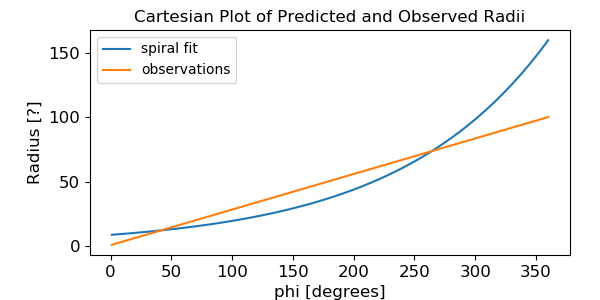

In [9]:
# Suggestions on how to show error bars on a polar plot?
# Current plan is to just use Cartesian
fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=.15, bottom=.15, right=.95, top=.9)
ax = fig.add_subplot(111)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

ax.plot(phi_even, predicted, label='spiral fit')
ax.plot(phi_even, r_even, label='observations')

plt.xlabel('phi [degrees]', fontsize=12)
plt.ylabel('Radius [?]', fontsize=12)
plt.title('Cartesian Plot of Predicted and Observed Radii')

ax.legend(loc='upper left')

<IPython.core.display.Javascript object>


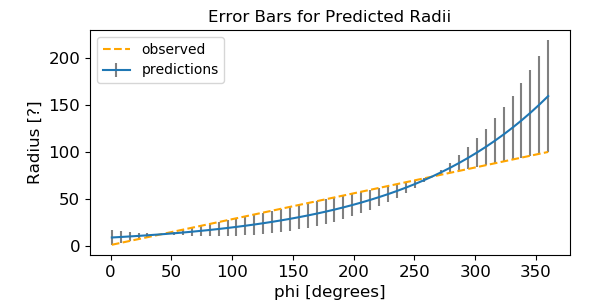

In [10]:
# The question is, which is error and which is discrepancy?
fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=.15, bottom=.15, right=.95, top=.9)
ax = fig.add_subplot(111)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

ax.errorbar(phi_even, predicted, r_even - predicted, ecolor='gray', label='predictions')
ax.plot(phi_even, r_even, color='orange', linestyle='dashed', label='observed')

plt.xlabel('phi [degrees]', fontsize=12)
plt.ylabel('Radius [?]', fontsize=12)
plt.title('Error Bars for Predicted Radii')

ax.legend(loc='upper left')

In [11]:
# This is probably not helpful with neither a scale nor point of reference.
sum_squares = sum((r_even - predicted) ** 2)
print('Sum of squares:', sum_squares)

Sum of squares: 16343.96396350076


In [13]:
# Begin sanity check
# We expect a higher sum of squares when fitting a spiral to random data
fit_to_random = even_fit = np.polyfit(
    phi_random, np.log(r_random), 1, full=False
)
kappa_r = fit_to_random[0]
offset_r = fit_to_random[1]
print('Automatic fit found:')
print('Tangent of pitch angle = ' + str(kappa_r))
print('Radial offset and phase term = ' + str(offset_r))
y_r = kappa_r * phi_random + offset_r
pred_r = np.exp(y_r)

Automatic fit found:
Tangent of pitch angle = -0.002845264501098703
Radial offset and phase term = 1.7353147077345883


<IPython.core.display.Javascript object>


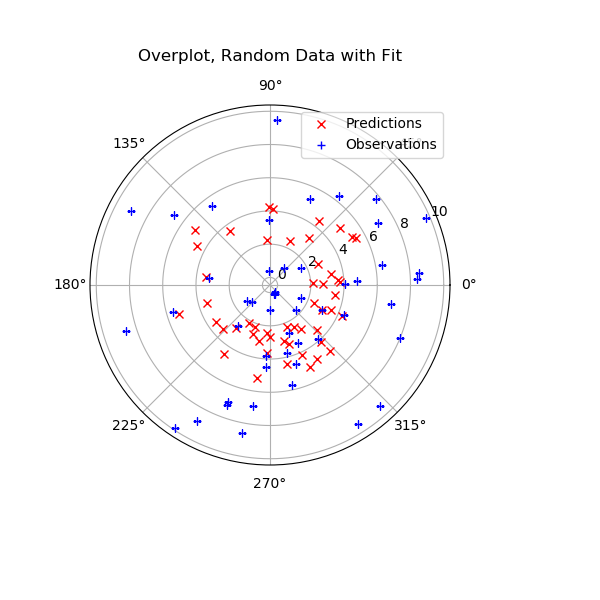

Text(0.5, 1.05, 'Overplot, Random Data with Fit\n')

In [14]:
fig = plt.figure(figsize=(6,6))
plt.subplots_adjust(left=.15, bottom=.15, right=.75, top=.9)
ax = fig.add_subplot(111, projection='polar')

ax.plot(phi_random, pred_r, marker="x",
          color="red", linestyle="None", label="Predictions")
ax.plot(phi_random, r_random, marker="+",
          color="blue", linestyle="None", label="Observations")

plt.legend(bbox_to_anchor=(1, 1))
plt.title('Overplot, Random Data with Fit\n')

<IPython.core.display.Javascript object>


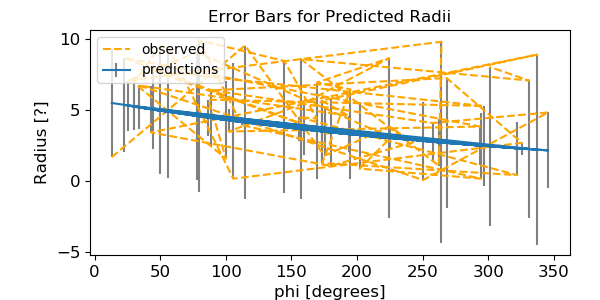

In [15]:
# Again: which is error and which is discrepancy?
fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=.15, bottom=.15, right=.95, top=.9)
ax = fig.add_subplot(111)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

ax.errorbar(phi_random, pred_r, r_random - pred_r, ecolor='gray', label='predictions')
ax.plot(phi_random, r_random, color='orange', linestyle='dashed', label='observed')

plt.xlabel('phi [degrees]', fontsize=12)
plt.ylabel('Radius [?]', fontsize=12)
plt.title('Error Bars for Predicted Radii')

ax.legend(loc='upper left')

In [16]:
sum_sq_r = sum((r_random - pred_r) ** 2)
print('Sum of squares:', sum_sq_r)

Sum of squares: 532.8665211825914
